## Lab 1: Machine Learning Engineering

- Pablo Escobar 20936
- Diego Cordova 20212
- Paola Contreras 20213
- Paola de León 20361
- Jun Woo 20358
- Sebastian Gonzalez 18588

> Repositorio: https://github.com/Diego-CB/Lab1-MLE

In [1]:
import pandas as pd

In [2]:
# save filepath to variable for easier access
melbourne_file_path = './input/melbourne-housing-snapshot/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [3]:
melbourne_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


Aqui estamos realizando un analisis exploratorio de los datos numericos para poder observar como se comportan los datos.
Cone stos datos podemos afirmar cosas como que en promedio, las propiedades tienen aproximadamente 2.94 habitaciones y un precio medio de alrededor de 1,075,684, con una desviación estándar considerable de $639,311, lo que indica una dispersión significativa en los precios. 

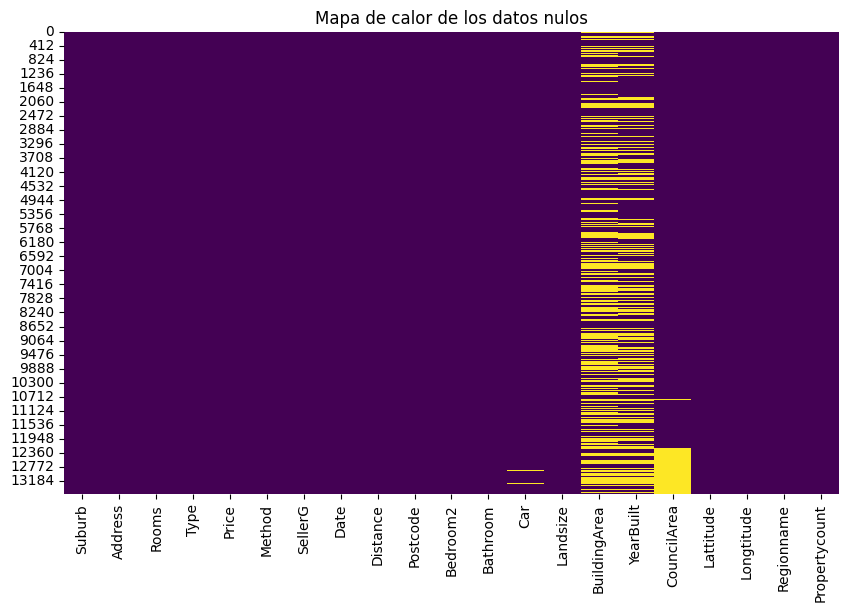

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(melbourne_data.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de los datos nulos')
plt.show()


Con este grafico podemos observar en que columnas existen mayor cantidad de datos nulos, lo que nos puede ayudar al momento de que limpiemos la data para entrenar al modelo

In [5]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
melbourne_data = melbourne_data.dropna(axis=0)

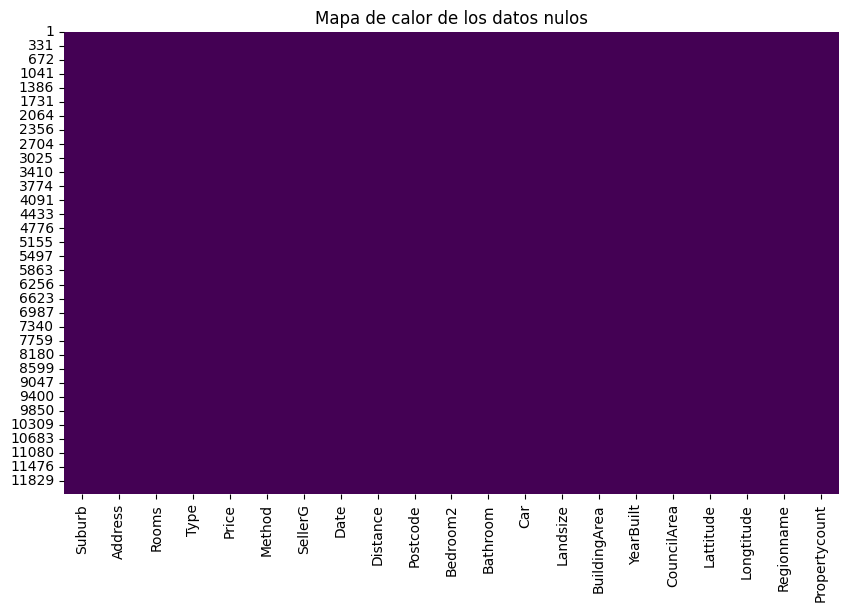

In [7]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(melbourne_data.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de los datos nulos')
plt.show()


Limpiamos los datos nulos que existían en nuestro dataset

In [8]:
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


Escogemos los features con los cuales entrenaremos nuestro modelo.

### Train Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [13]:
type(X_test)

pandas.core.frame.DataFrame

### Elección de Modelo

En este caso se utilizó un GridSearch para encontrar para comparar varios modelos con varios parámetros con el finde evaluarlos con el dataset y encontrar el que brinda mejor rendimiento. Para esto se compararon los siguientes modelos:
- Regresión Lineal
- Árbol de Decisión
- Random Forest
- Support Vector Machines

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.svm import LinearSVR
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('regr', LinearRegression())  # Default model, will be overridden by GridSearch
])

search_space = [
    {'regr': [LinearRegression()], 'regr__fit_intercept': [True, False]},
    {'regr': [tree.DecisionTreeRegressor()], 
    'regr__max_depth': [None, 10, 20]},

    {'regr': [RandomForestRegressor()],
    'regr__n_estimators': [10, 50, 100],
    'regr__max_depth': [None, 10, 20],
    'regr__max_features': ['auto', 'sqrt', 'log2', None, 0.2, 0.5]},

    {'regr': [LinearSVR()],
    'regr__epsilon': [0.01, 0.1, 1, 10, 100]}
]

gs = GridSearchCV(pipeline, param_grid = search_space, scoring = 'neg_mean_squared_error', cv = 5)
gs.fit(X_train, y_train)

c:\Users\TEMP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\TEMP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\TEMP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\TEMP\AppData\L

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regr', LinearRegression())]),
             param_grid=[{'regr': [LinearRegression()],
                          'regr__fit_intercept': [True, False]},
                         {'regr': [DecisionTreeRegressor()],
                          'regr__max_depth': [None, 10, 20]},
                         {'regr': [RandomForestRegressor()],
                          'regr__max_depth': [None, 10, 20],
                          'regr__max_features': ['auto', 'sqrt', 'log2', None,
                                                 0.2, 0.5],
                          'regr__n_estimators': [10, 50, 100]},
                         {'regr': [LinearSVR()],
                          'regr__epsilon': [0.01, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error')

In [14]:
best_pipeline = gs.best_estimator_
best_regression_model = best_pipeline.named_steps['regr']
best_model_hyperparameters = best_regression_model.get_params()

print("> Best Regresion Model:", best_regression_model)
print("> Best Hyper-parameters:", best_model_hyperparameters)

> Best Regresion Model: RandomForestRegressor(max_features=0.5)
> Best Hyper-parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
model = best_regression_model

# Crear un nuevo pipeline con el mejor modelo
new_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Paso de preprocesamiento
    ('regr', best_regression_model())  # Usar los mejores parámetros
])

# Ajustar el nuevo pipeline con los datos de entrenamiento
new_pipeline.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

# Realizar predicciones con el nuevo pipeline
y_pred = new_pipeline.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)



Error cuadrático medio en el conjunto de prueba: 171975464513.76917


En este caso el modelo con mejor rendimiento fue el RandomForest, además se logró encontrar los hiperparámetros más adecuados con el mismo gridSearch

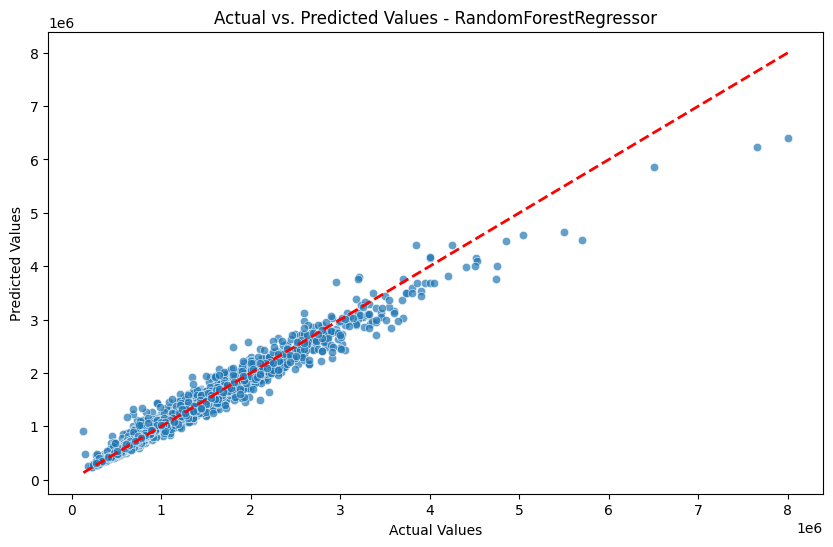

In [ ]:
model = best_regression_model
y_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - RandomForestRegressor')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular las métricas
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

# Importancia de las variables
feature_importances = model.feature_importances_

featuresArray = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
# Mostrar los resultados
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"R² (Coeficiente de Determinación): {r2}")

print("\nImportancia de las Variables:")
for i, importance in enumerate(feature_importances):
    print(f"{featuresArray[i]}: {importance}")


Error Cuadrático Medio (MSE): 13257277967.425127
Error Absoluto Medio (MAE): 69361.45243731234
R² (Coeficiente de Determinación): 0.9688784502677918

Importancia de las Variables:
Rooms: 0.2739266406476306
Bathroom: 0.05575731536004612
Landsize: 0.16477917881511578
Lattitude: 0.26150031760293596
Longtitude: 0.24403654757427154


Estos resultados nos indican que nuestros valores mas importantes son la cantidad de cuartos y la latitud y longitud de la propiedad. El siguiente feature más importante es el tamaño de la propiedad el feature menos importante para nuestro modelo es la cantidad de baños.